In [26]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import numpy as np

plt.style.use('ggplot')


In [27]:

def plot_predictions(inputs, predictions, targets, title, figname):
    # for _ in range(3):
        # sample_index = np.random.randint(len(inputs))
        print(len(inputs))
        sample_index = 2
        location_index = 1

        input_sample = inputs[sample_index][:, location_index]
        prediction_sample = predictions[sample_index][:, location_index]
        target_sample = targets[sample_index][:, location_index]

        time_axis_input = np.arange(120)
        time_axis_future = np.arange(120, 132)

        # Extend the input time axis and samples to include the first future point for a seamless transition
        extended_time_axis_input = np.append(time_axis_input, time_axis_future[0])
        extended_input_sample = np.append(input_sample, target_sample[0])

        plt.figure(figsize=(12, 6))
        plt.plot(extended_time_axis_input, extended_input_sample, label='Historical Temperature', zorder=1)
        plt.plot(time_axis_future, target_sample, label='Actual Temperature', zorder=2)
        plt.plot(time_axis_future, prediction_sample, label='Predicted Temperature', linestyle='--', zorder=3, color="black")

        plt.title(title)
        plt.xlabel('Time Steps')
        plt.ylabel('Temperature Anomaly')
        plt.legend()
        plt.savefig(f'figures/{figname}.pdf')
        plt.show()


def display_test_results(file_path, title, figname):
    with open(file_path, 'rb') as f:
        test_results = pickle.load(f)

    test_loss = test_results['loss']
    test_rmse = test_results['rmse']
    test_mae = test_results['mae']
    test_r_squared = test_results['r_squared']
    inputs = test_results['inputs']
    predictions = test_results['predictions']
    targets = test_results['targets']

    print(f"Test Loss: {test_loss} | Test RMSE: {test_rmse} | Test MAE: {test_mae} | Test R^2: {test_r_squared}")
    plot_predictions(inputs, predictions, targets, title, figname)

Test Loss: 0.014609364792704582 | Test RMSE: 0.1199866955478986 | Test MAE: 0.08321057508389156 | Test R^2: 0.6911923817356431
3


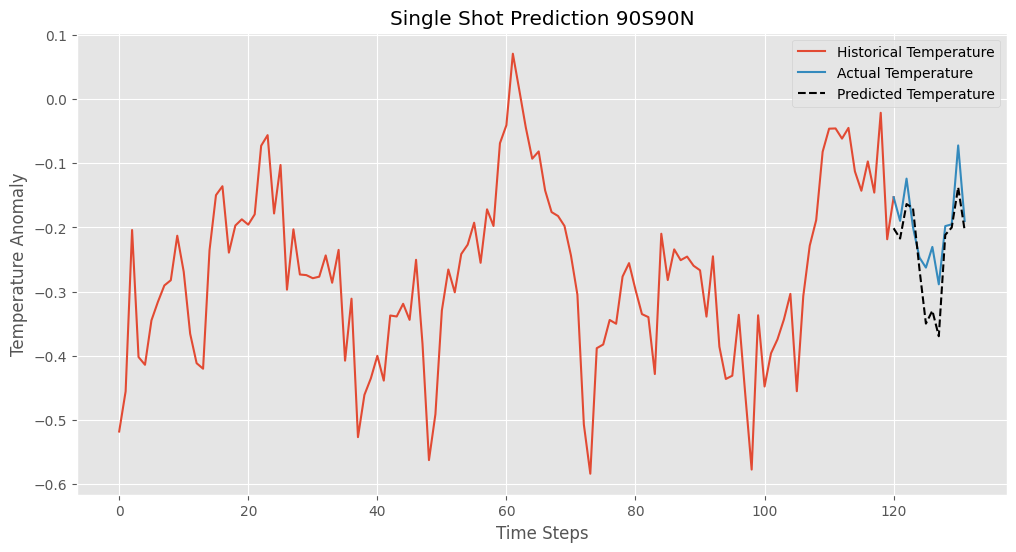

In [28]:
display_test_results('results/single_shot_test_results.pkl', 'Single Shot Prediction 90S90N', figname='Single Shot Prediction 90S90N')

Test Loss: 0.006445898053546746 | Test RMSE: 0.07919661949078242 | Test MAE: 0.056023430079221725 | Test R^2: 0.8965338748142856
3


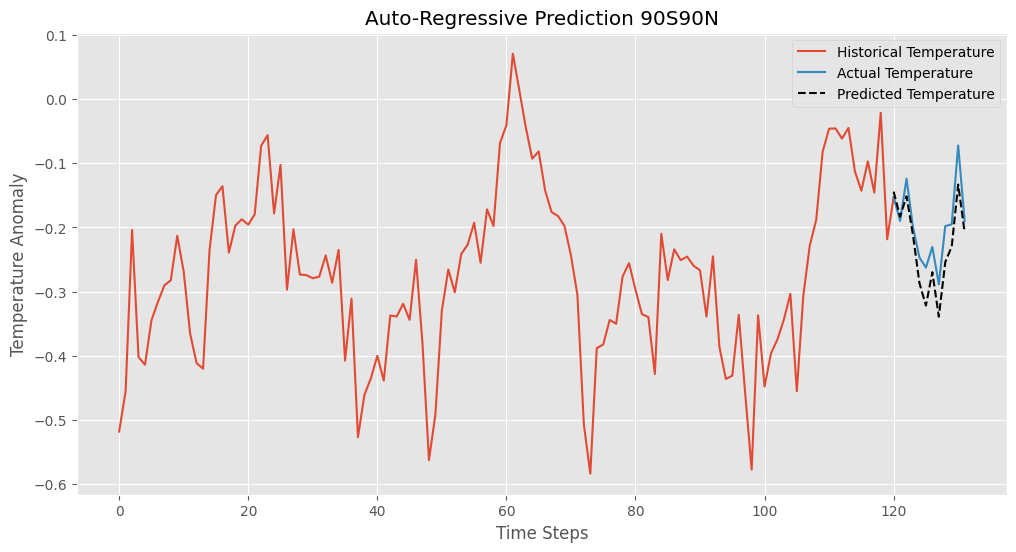

In [29]:
display_test_results('results/auto_reg_test_results.pkl', 'Auto-Regressive Prediction 90S90N', figname='Auto-Regressive Prediction 90S90N')

Test Loss: 0.016223895984391373 | Test RMSE: 0.1261079708735148 | Test MAE: 0.0859455019235611 | Test R^2: 0.7396672220886752
3


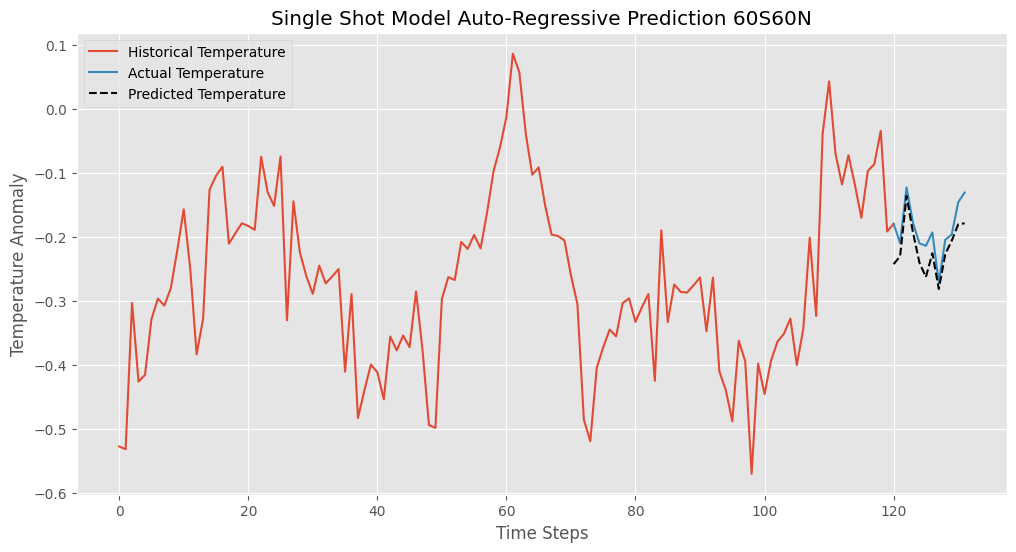

In [25]:
display_test_results('results/auto_reg_single_shot_test_results.pkl', 'Single Shot Model Auto-Regressive Prediction 90S90N', figname='Single Shot Model Auto-Regressive Prediction 90S90N')
